In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def manual_binomial_dist(p:float, n:int, runs:int):
    """use an algorithm defined by the definition of the binomial distribution
    return a list of the count found in each batch
    Warning: instruction scales by n*runs not just runs"""
    trials = np.random.random(size=(runs, n)) < p
    successes = np.sum(trials, axis=1)
    unique, count_list = np.unique(successes, return_counts=True)
    return unique, count_list

# Binomial Distribution
For a binary outcome (True or false, Yes or no, 1 or 0, Head or Tails), the probability that it results in the desired outcome is assigned $p$

If we run that trial $n$ times, the probability that we get $k$ amount of desired outcome in that trial is 

$$
P(X=k) = {{n}\choose{k}}p^k(1-p)^{n-k}
$$




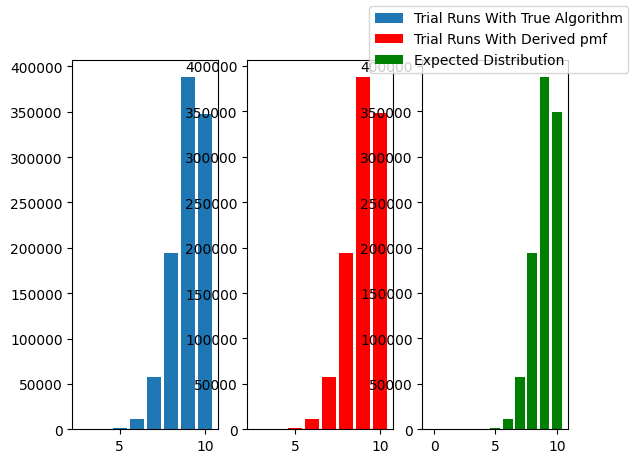

In [8]:
# num of batch
runs = 1_000_000
# per batch
n = 10
p = 0.9
# Generate using definition of binomial distribution
unique_manual, manual_binom_trial = manual_binomial_dist(p, n, runs)


# Generate using the derived Probability Mass Function (pmf) of the binomial distribution
binomial_rv = stats.rv_discrete(name="binomial", values=(np.arange(n+1),(lambda k: np.array([math.comb(n,i) for i in k])*(p**k)*((1-p)**(n-k)))(np.arange(n+1))))
unique_derived_pmf, binom_trial = np.unique(binomial_rv.rvs(size=runs), return_counts=True)

# The expected distribution
expected_dist = binomial_rv.pmf(np.arange(n+1))*runs

fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].bar(unique_manual, manual_binom_trial, label="Trial Runs With True Algorithm")
ax[1].bar(unique_derived_pmf, binom_trial, label="Trial Runs With Derived pmf", color="red")
ax[2].bar(np.arange(n+1), expected_dist, label="Expected Distribution", color="green")
fig.legend()

# Binomial Distribution -> Normal Distribution
$X \sim B(n, p)$

When $n>>50$

$X \sim N(np, np(1-p))$

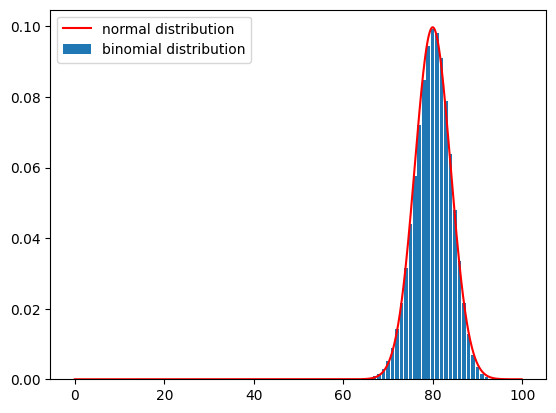

In [46]:
n = 100
p = 0.8
binomial_rv = stats.binom(n,p)
normal_rv = stats.norm(n*p, (n*p*(1-p))**0.5)
fig, ax = plt.subplots(nrows=1, ncols=1)
x_binomial = np.arange(0, n+1, 1)
x_normal = np.arange(0, n, 0.1)
ax.bar(x_binomial, binomial_rv.pmf(x_binomial), label="binomial distribution")
ax.plot(x_normal, normal_rv.pdf(x_normal), label="normal distribution", color="red")
plt.legend()